# Linear Regression

## Regression model
Linear regression model's equation is as follows:

$$f(x)=Wx+b$$

Where:
- $f(x)$ is the predicted value
- $W$ : weight
- $b$ : bias  

## MSE(Mean Squared Error)

### Loss function  
Also known as objective function or cost function.  
Loss function measures how well the model is performing.  

We define loss function by using MSE(Mean Squared Error)  

$$Loss(W,b)=\frac{1}{n}\Sigma_{i=1}^{n} (f(x_i)-y_i)^2$$

### Optimization

$$\tilde{\theta} = {\underset{\theta}{argmin}} Loss(x, y; \theta)$$  

Where:
- $Loss$ : loss function
- $argmin$ : argument that minimizes the function
- $\theta$ : model parameters ($W$, $b$)
- $\tilde{\theta}$ : optimal model parameters ($\hat W$, $\hat b$)
- $x$ : input data
- $y$ : target data

### Find optimal model parameters

Since Loss function is a convex function, we can find the optimal model parameters by finding the point where the derivative of the loss function is zero.

$$\frac{\partial L}{\partial \theta}=0$$

In our case, we have two parameters $W$ and $b$.
$$\frac{\partial L}{\partial W}=0$$  
$$\frac{\partial L}{\partial b}=0$$  

linear model: f=-0.5x+2
MSE:1.4166666666666667


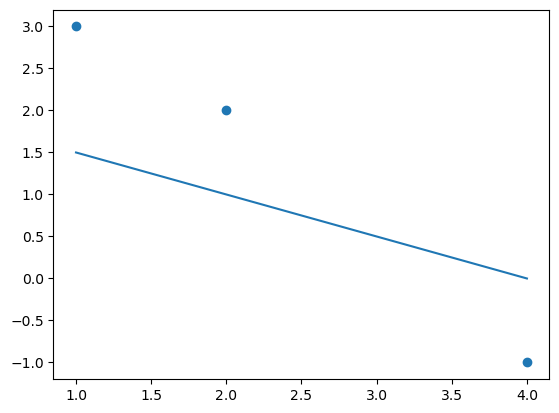

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
x=np.array([1,2,4])
y=np.array([3,2,-1])

# random W, b
W = -0.5
b = 2

# predicted value
f= W*x + b

# Loss function
print(f"linear model: f={W}x+{b}\nMSE:{((f-y)**2).mean()}")

# plot
plt.scatter(x,y)
plt.plot(x,f)
plt.show()


### Loss function visualization

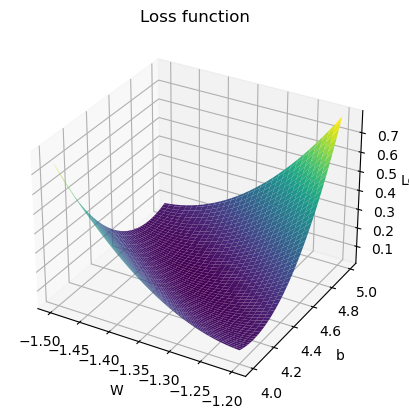

In [27]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
x=np.array([1,2,4])
y=np.array([3,2,-1])

# W,b
W = np.arange(-1.5,-1.2,0.01)
b = np.arange(4,5,0.01)

# Loss function 
# calculate loss for all W,b
loss = ((W.reshape(-1,1,1) * x.reshape(1,1,-1) + b.reshape(1, -1,1) -y.reshape(1,1,-1))**2).mean(axis=2)

# plot loss function by W,b
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
W, b = np.meshgrid(W, b)
ax.plot_surface(W, b, loss.T, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.set_title('Loss function')
plt.show()

We will optimize the model parameters $W$ and $b$ to minimize the loss function.
$$
\begin{aligned}
L
&=\frac{1}{3}((f(x_1)-y_1)^2+(f(x_2)-y_2)^2+(f(x_3)-y_3)^2)\\
&=\frac{1}{3}((W \times 1 + b - 3)^2+(W \times 2 + b - 2)^2+(W \times 4 + b - (-1))^2)\\
&=\frac{1}{3}(W^2+2Wb+b^2-6W-6b+9+4W^2+4Wb+b^2-8W-4b+4+16W^2+8Wb+b^2+8W+2b+1)\\
&=\frac{1}{3}(21W^2+3b^2+14Wb-6W-8b+14)\\
\end{aligned}
$$
To find the optimal model parameters, we need to find the point where the derivative of the loss function is zero.
$$
\begin{aligned}
\frac{\partial L}{\partial W}
&=\frac{1}{3}(42W+14b-6)\\
\frac{\partial L}{\partial b}
&=\frac{1}{3}(14W+6b-8)\\
\end{aligned}
$$
Setting the derivative of the loss function to zero, we can find the optimal model parameters.
$$
\begin{aligned}
\frac{\partial L}{\partial W}=0
&\Rightarrow 42W+14b-6=0\\
&\Rightarrow 42W+14b=6\\
\frac{\partial L}{\partial b}=0
&\Rightarrow 14W+6b-8=0\\
&\Rightarrow 14W+6b=8\\
\end{aligned}
$$
Solving the above equations, we can find the optimal model parameters.
$$
\begin{aligned}
W&=-\frac{19}{14}\\
b&=\frac{9}{2}\\
\end{aligned}
$$

linear model: f=-1.3571428571428572x+4.5
MSE:0.023809523809523808


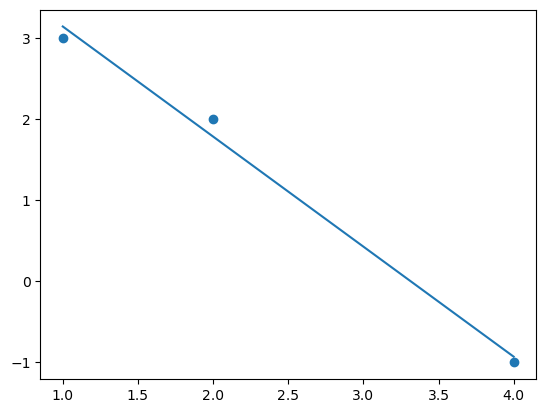

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
x=np.array([1,2,4])
y=np.array([3,2,-1])

# random W, b
W = - 19/14
b = 9/2

# predicted value
f= W*x + b

# Loss function
print(f"linear model: f={W}x+{b}\nMSE:{((f-y)**2).mean()}")

# plot
plt.scatter(x,y)
plt.plot(x,f)
plt.show()

## Gradient Descent

### Gradient
Gradient is a slope of a function.  
We can find the gradient of the loss function.  
$$\nabla Loss(x, y; \theta) = \begin{bmatrix} \frac{\partial L}{\partial W} \\ \frac{\partial L}{\partial b} \end{bmatrix}$$  

### Extreme points
Extreme points are the points where the derivative of the function is zero.  
There are two types of extreme points:  
- Local extreme points  
- Global extreme points  

In our case, we are looking for the global minimum point of the loss function.  
However, since the loss function is convex, there is only one minimum point which is the global and local minimum point.  

### Gradient Descent
Gradient descent is an optimization algorithm used to minimize the loss function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. 
By using gradient descent, we can find the local minimum point of any function.  

$$\theta_{t+1} = \theta_{t} - \alpha \nabla Loss(x, y; \theta)$$
where:
- $\theta_{t}$ : model parameters at time $t$
- $\alpha$ : learning rate

In our case, we have two parameters $W$ and $b$. 
$$W_{t+1} = W_{t} - \alpha \nabla Loss(x, y; W)$$  
$$b_{t+1} = b_{t} - \alpha \nabla Loss(x, y; b)$$  

### Gradient Descent in Linear Regression
We will use gradient descent to find the optimal model parameters $W$ and $b$ in linear regression.
$$\frac{\partial L}{\partial W}=\frac{1}{n}\Sigma_{i=1}^{n} 2(f(x_i)-y_i)x_i$$
$$\frac{\partial L}{\partial b}=\frac{1}{n}\Sigma_{i=1}^{n} 2(f(x_i)-y_i)$$
$$W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W}$$
$$b_{t+1} = b_{t} - \alpha \frac{\partial L}{\partial b}$$


epoch:0 W:-0.5033333333333333 b:2.01 loss:5.259072701473412e-31
epoch:100 W:-0.7842870100073865 b:2.830390826433511 loss:5.259072701473412e-31
epoch:200 W:-0.9730032064233464 b:3.3804110354226964 loss:5.259072701473412e-31
epoch:300 W:-1.099550529181911 b:3.7492378040000007 loss:5.259072701473412e-31
epoch:400 W:-1.1844093023013929 b:3.9965617804606146 loss:5.259072701473412e-31
epoch:500 W:-1.2413130061362196 b:4.16240969211909 loss:5.259072701473412e-31
epoch:600 W:-1.2794708935424233 b:4.273622240918857 loss:5.259072701473412e-31
epoch:700 W:-1.3050584084699377 b:4.348197982553819 loss:5.259072701473412e-31
epoch:800 W:-1.322216615191292 b:4.398206199256213 loss:5.259072701473412e-31
epoch:900 W:-1.3337223850453284 b:4.431740183403431 loss:5.259072701473412e-31
linear model: f=-1.3413749158582025x+4.454043762409487
MSE:0.02428026419486973


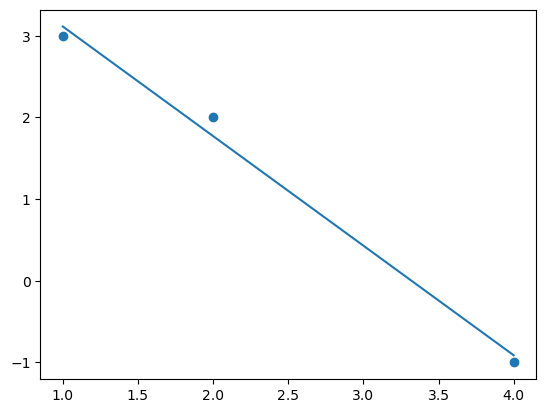

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
x=np.array([1,2,4])
y=np.array([3,2,-1])

# random W, b
W = -0.5
b = 2
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # predicted value
    f= W*x + b

    # gradient
    dW = 2*((f-y)*x).mean()
    db = 2*(f-y).mean()

    # update W, b
    W -= learning_rate*dW
    b -= learning_rate*db

    if epoch%100==0:
        print(f"epoch:{epoch} W:{W} b:{b} loss:{loss}")
      
# final model
f= W*x + b
print(f"linear model: f={W}x+{b}\nMSE:{((f-y)**2).mean()}")
        
# plot
plt.scatter(x,y)
plt.plot(x,f)
plt.show()